In [1]:
from fbprophet import Prophet
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle('../Data/LD2011_2014.pkl')
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [3]:
df = df.resample('1h').sum()
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,8.883249,100.995733,6.950478,745.934959,368.292683,1363.095238,45.223290,1262.626263,367.132867,325.806452,...,1334.047109,158800.0,6810.126582,8954.545455,299.869622,17.554125,1503.072871,435.726210,2753.665689,33621.621622
2014-12-31 21:00:00,10.152284,91.038407,6.950478,648.373984,345.121951,1279.761905,46.353872,1077.441077,305.944056,280.645161,...,1309.064954,154300.0,6599.156118,5909.090909,299.869622,15.798713,1862.159789,619.365609,2648.093842,33135.135135
2014-12-31 22:00:00,7.614213,88.193457,6.950478,644.308943,347.560976,1258.928571,45.223290,1006.734007,286.713287,289.247312,...,1224.839400,141900.0,6544.303797,5500.000000,256.844850,31.012288,2620.719930,781.302170,2717.008798,30378.378378
2014-12-31 23:00:00,8.883249,85.348506,6.950478,646.341463,335.365854,1232.142857,42.962125,1003.367003,258.741259,290.322581,...,1087.794433,112300.0,6185.654008,4931.818182,113.428944,29.256875,2704.126427,646.076795,2637.096774,27729.729730


In [4]:
df = df.loc['2011-01-01':'2014-12-31']
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.883249,113.086771,6.950478,841.463415,381.707317,1589.285714,48.615037,1410.774411,405.594406,348.387097,...,1587.437545,166500.0,9915.611814,10409.090909,322.033898,18.139263,1869.183494,158.597663,2770.527859,35891.891892
2014-12-31 20:00:00,8.883249,100.995733,6.950478,745.934959,368.292683,1363.095238,45.223290,1262.626263,367.132867,325.806452,...,1334.047109,158800.0,6810.126582,8954.545455,299.869622,17.554125,1503.072871,435.726210,2753.665689,33621.621622
2014-12-31 21:00:00,10.152284,91.038407,6.950478,648.373984,345.121951,1279.761905,46.353872,1077.441077,305.944056,280.645161,...,1309.064954,154300.0,6599.156118,5909.090909,299.869622,15.798713,1862.159789,619.365609,2648.093842,33135.135135
2014-12-31 22:00:00,7.614213,88.193457,6.950478,644.308943,347.560976,1258.928571,45.223290,1006.734007,286.713287,289.247312,...,1224.839400,141900.0,6544.303797,5500.000000,256.844850,31.012288,2620.719930,781.302170,2717.008798,30378.378378


In [5]:
df_marked = df.copy()
starting = []
for column in tqdm(range(len(df.columns))):
    for i in range(len(df_marked)-1):
        if df.iloc[i,column] == 0 and df.iloc[i+1,column] == 0:
            df_marked.iloc[i,column] = np.nan
        elif df.iloc[i,column] == 0 and df.iloc[i+1,column] > 0:
            df_marked.iloc[i,column] = np.nan
            starting.append(i)
            break
        
df_marked
        

100%|██████████| 370/370 [02:22<00:00,  2.60it/s]


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.883249,113.086771,6.950478,841.463415,381.707317,1589.285714,48.615037,1410.774411,405.594406,348.387097,...,1587.437545,166500.0,9915.611814,10409.090909,322.033898,18.139263,1869.183494,158.597663,2770.527859,35891.891892
2014-12-31 20:00:00,8.883249,100.995733,6.950478,745.934959,368.292683,1363.095238,45.223290,1262.626263,367.132867,325.806452,...,1334.047109,158800.0,6810.126582,8954.545455,299.869622,17.554125,1503.072871,435.726210,2753.665689,33621.621622
2014-12-31 21:00:00,10.152284,91.038407,6.950478,648.373984,345.121951,1279.761905,46.353872,1077.441077,305.944056,280.645161,...,1309.064954,154300.0,6599.156118,5909.090909,299.869622,15.798713,1862.159789,619.365609,2648.093842,33135.135135
2014-12-31 22:00:00,7.614213,88.193457,6.950478,644.308943,347.560976,1258.928571,45.223290,1006.734007,286.713287,289.247312,...,1224.839400,141900.0,6544.303797,5500.000000,256.844850,31.012288,2620.719930,781.302170,2717.008798,30378.378378


In [6]:
df_avg_1h = []
for i in tqdm(range(df_marked.shape[0])):
    df_avg_1h.append(df_marked.iloc[i,:].sum()/len(df_marked.iloc[i,:].dropna()))
df_avg_1h = pd.DataFrame(df_avg_1h,index=df_marked.index,columns=['avg_1h'])
df_avg_1h

100%|██████████| 35064/35064 [00:03<00:00, 10202.07it/s]


,avg_1h
2011-01-01 00:00:00,1310.495381
2011-01-01 01:00:00,1679.610828
2011-01-01 02:00:00,1670.406453
2011-01-01 03:00:00,1685.481862
2011-01-01 04:00:00,1644.646903
...,...
2014-12-31 19:00:00,2193.268257
2014-12-31 20:00:00,1804.877756
2014-12-31 21:00:00,1689.161553
2014-12-31 22:00:00,1569.872390


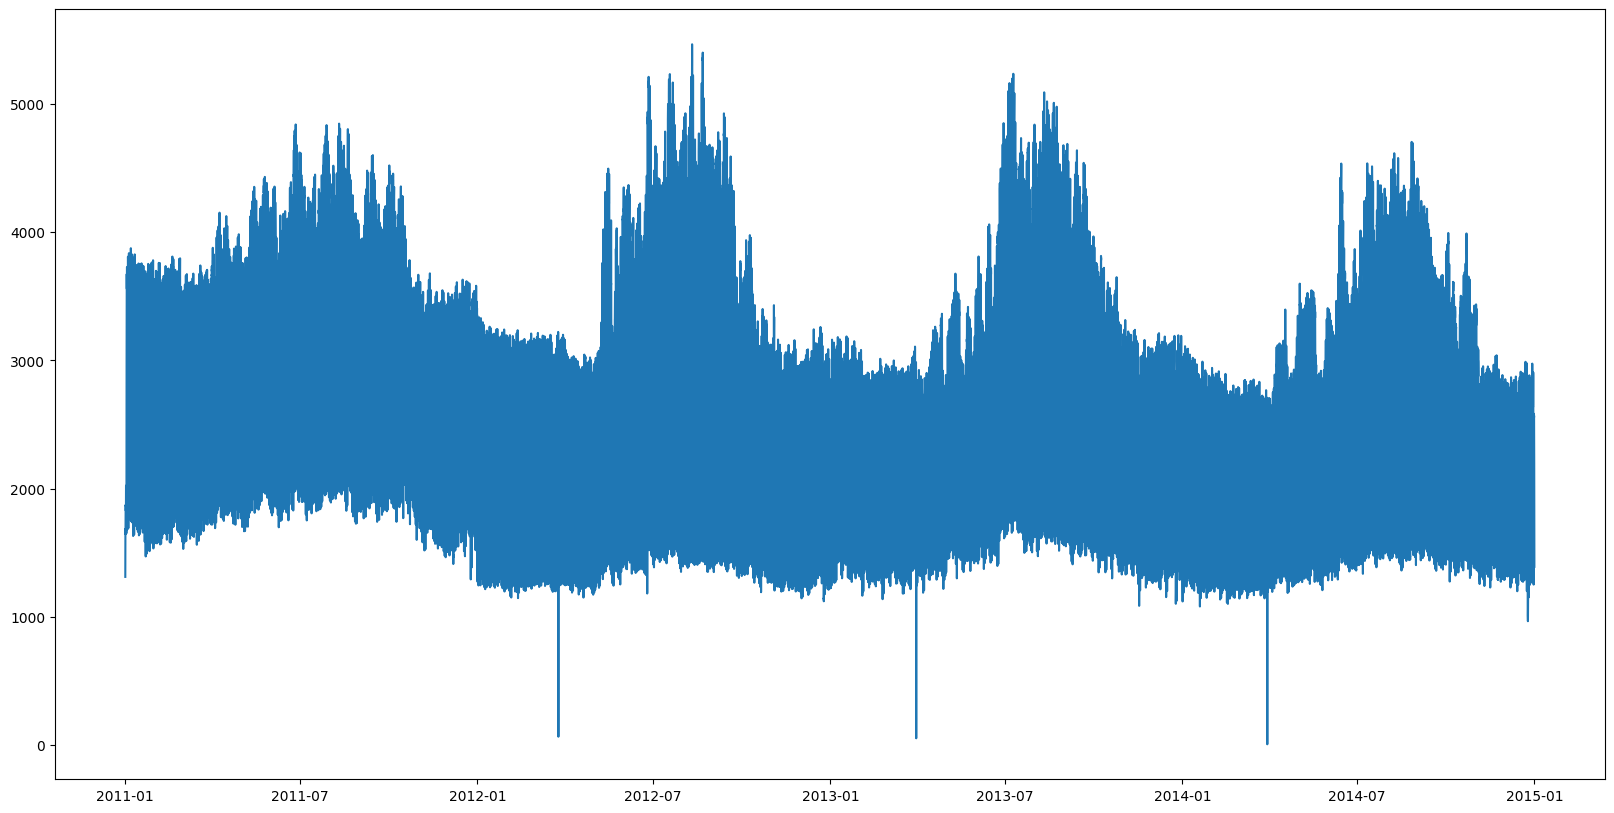

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df_avg_1h)

In [8]:
#df_avg_1h.to_pickle('../Data/df_avg_1h.pkl')

In [9]:
df_avg_1h['ds'] = df_avg_1h.index
df_avg_1h['y'] = df_avg_1h['avg_1h']
df_avg_1h = df_avg_1h.drop('avg_1h',axis=1)

In [10]:
df_avg_1h

,ds,y
2011-01-01 00:00:00,2011-01-01 00:00:00,1310.495381
2011-01-01 01:00:00,2011-01-01 01:00:00,1679.610828
2011-01-01 02:00:00,2011-01-01 02:00:00,1670.406453
2011-01-01 03:00:00,2011-01-01 03:00:00,1685.481862
2011-01-01 04:00:00,2011-01-01 04:00:00,1644.646903
...,...,...
2014-12-31 19:00:00,2014-12-31 19:00:00,2193.268257
2014-12-31 20:00:00,2014-12-31 20:00:00,1804.877756
2014-12-31 21:00:00,2014-12-31 21:00:00,1689.161553
2014-12-31 22:00:00,2014-12-31 22:00:00,1569.872390


In [11]:
training_x = df_avg_1h.iloc[:int(len(df_avg_1h)*0.8)]
val_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.8):int(len(df_avg_1h)*0.9)]
testing_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.9):]

In [12]:
print(training_x.shape)
print(val_x.shape)
print(testing_x.shape)


(28051, 2)
(3506, 2)
(3507, 2)


In [13]:
m = Prophet(growth='linear',yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
m.add_country_holidays(country_name='PT')
m.fit(training_x)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -823.716
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       67344.6    0.00561578       2840.04           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       67895.2    0.00153486        1551.6       0.415       0.415      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       67957.9   0.000304439       240.491       0.968       0.968      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       67971.5    0.00424583       2155.76           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         67991     0.0035534       1751.86      0.5346      0.5346      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [14]:
future = val_x[['ds']]
future.tail()

,ds
2014-08-07 16:00:00,2014-08-07 16:00:00
2014-08-07 17:00:00,2014-08-07 17:00:00
2014-08-07 18:00:00,2014-08-07 18:00:00
2014-08-07 19:00:00,2014-08-07 19:00:00
2014-08-07 20:00:00,2014-08-07 20:00:00


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
3501,2014-08-07 16:00:00,3847.534947,3163.172888,4575.638852
3502,2014-08-07 17:00:00,3864.687185,3164.240873,4595.654904
3503,2014-08-07 18:00:00,3871.442081,3172.514065,4584.117766
3504,2014-08-07 19:00:00,3869.144337,3147.846073,4615.704232
3505,2014-08-07 20:00:00,3818.176349,3123.362508,4622.802617


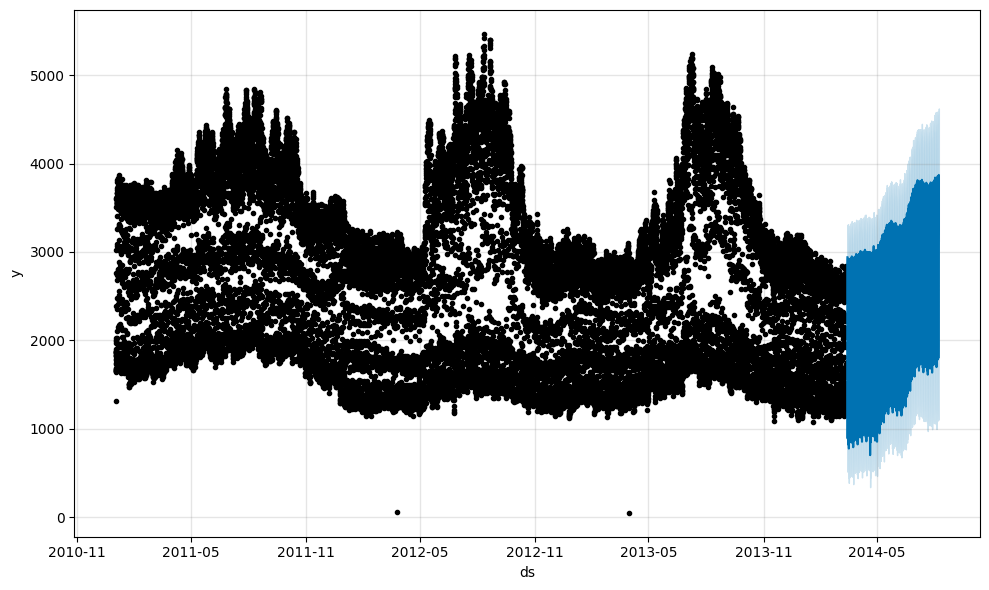

In [16]:
fig1 = m.plot(forecast)

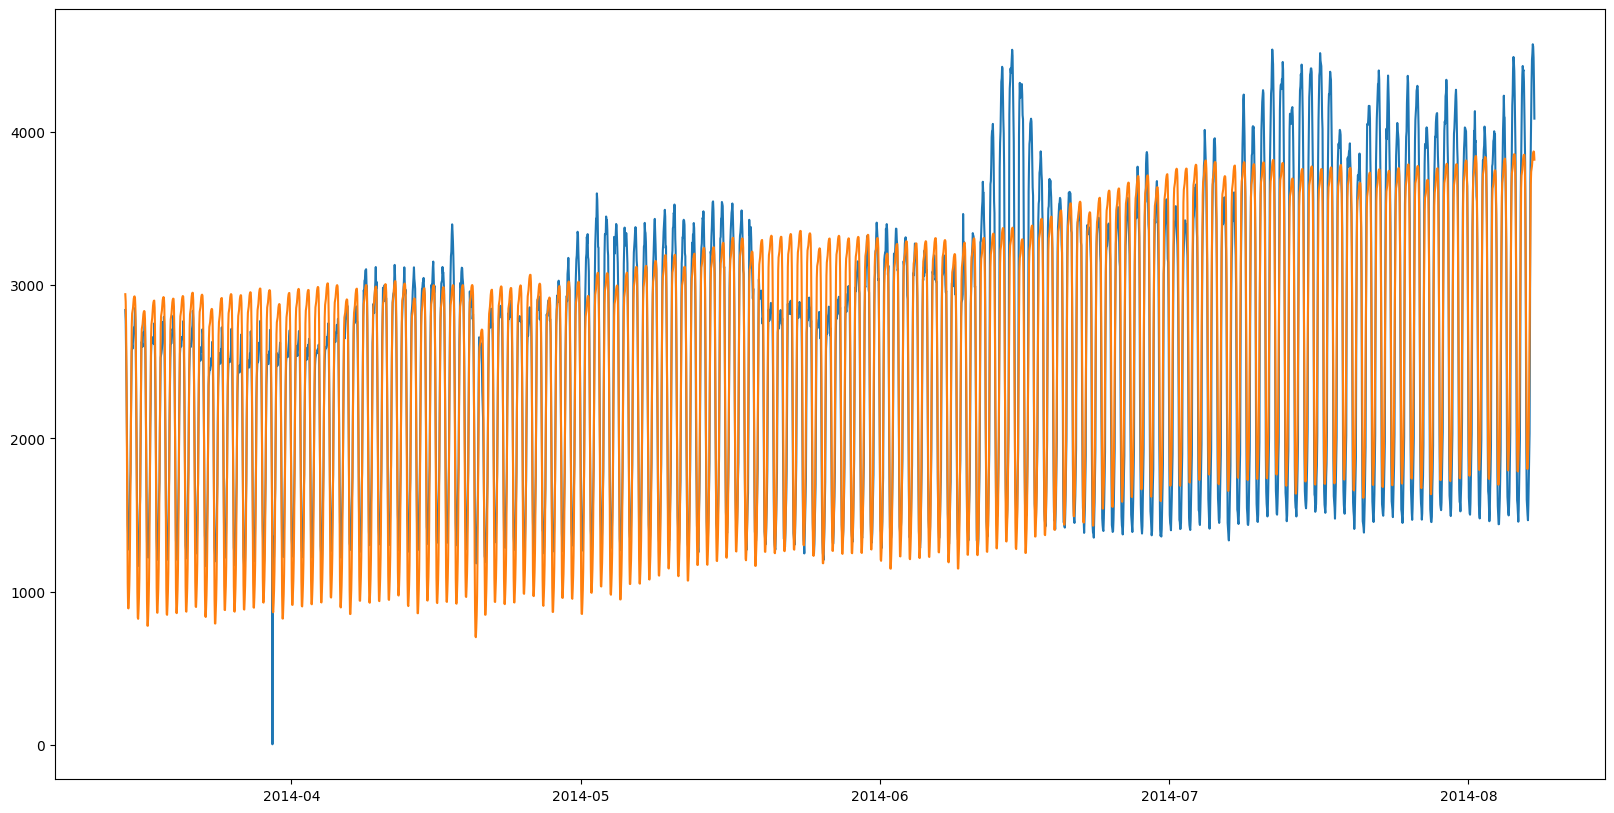

In [17]:
plt.figure(figsize=(20,10))
plt.plot(val_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [18]:
print(mean_absolute_percentage_error(val_x['y'],forecast['yhat']))

0.1622011467296156


In [ ]:
testing_x = pd.concat([val_x,testing_x],axis=0)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


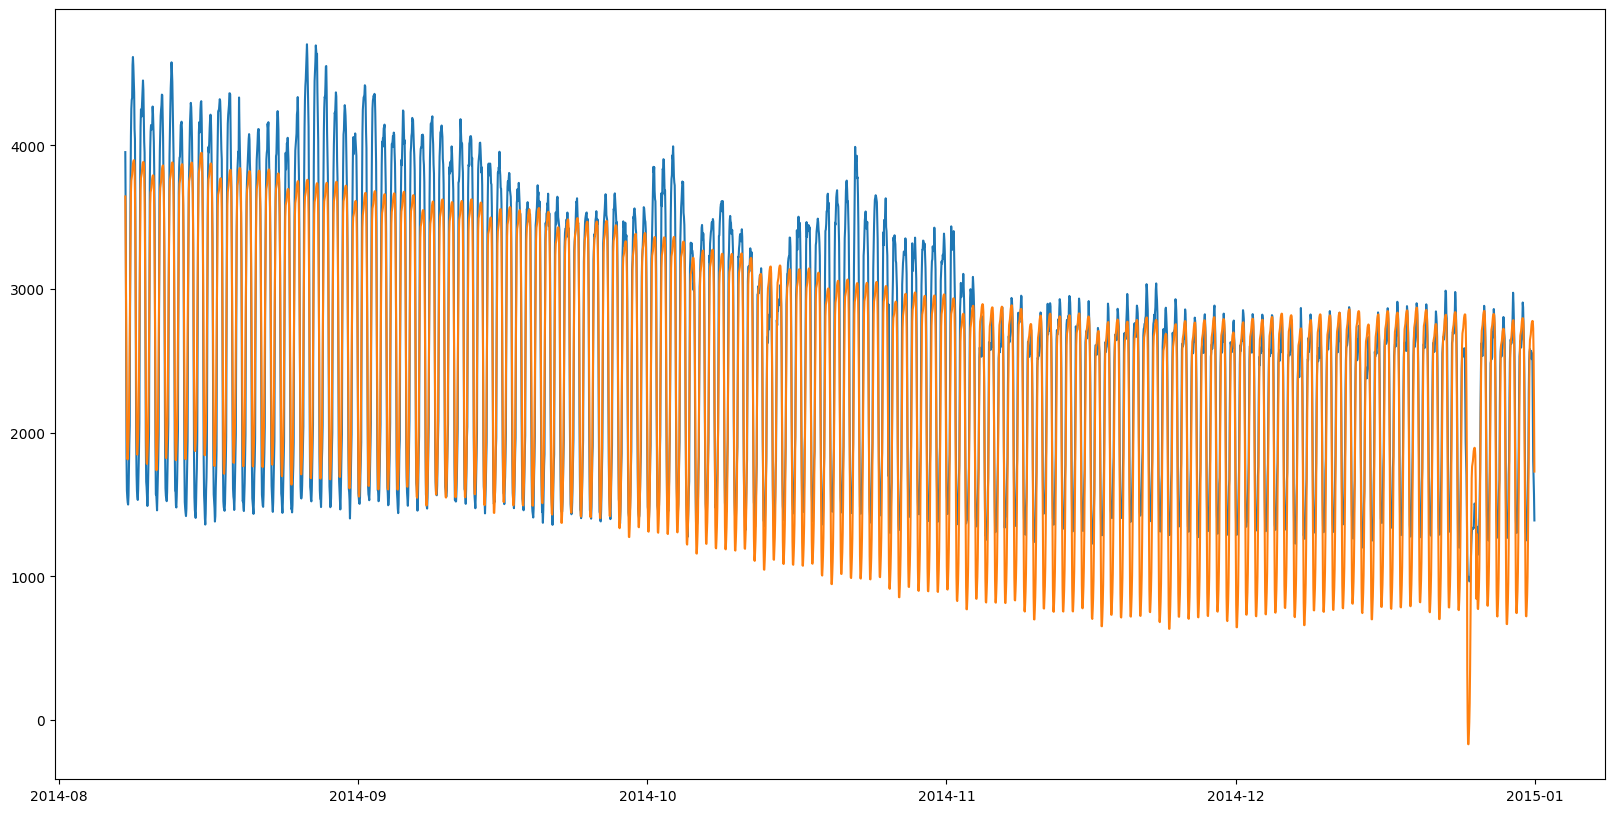

In [19]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [20]:
print(mean_absolute_percentage_error(testing_x['y'],forecast['yhat']))

0.12680541983017124


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


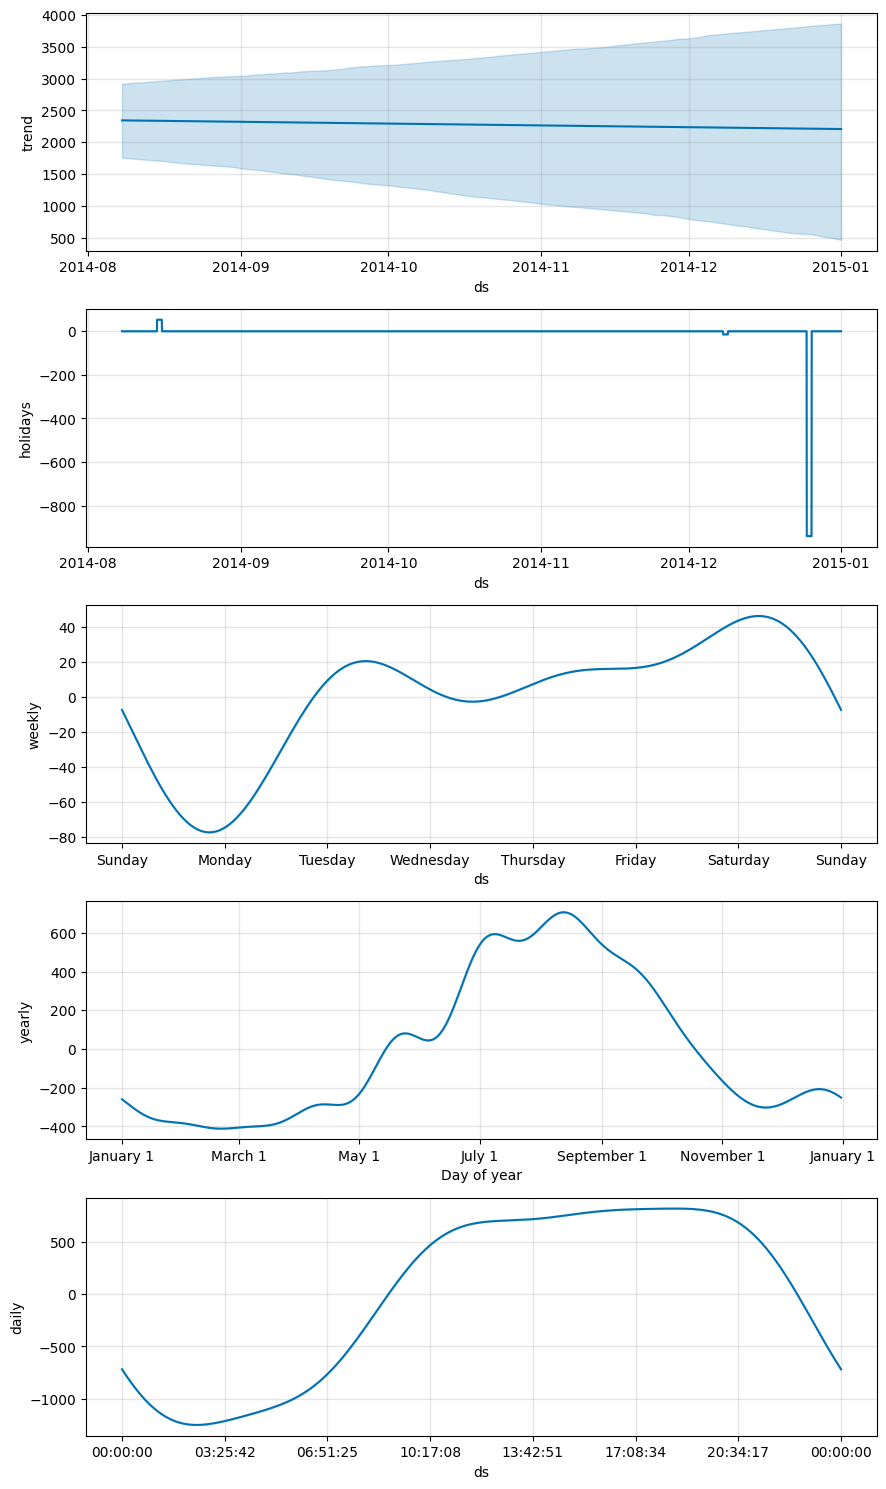

In [21]:
fig = m.plot_components(forecast)